<h2><font color="#004D7F" size=5>Módulo 3: Boosting</font></h2>


<h1><font color="#004D7F" size=6> 2. Gradient Boosting</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo Gradient Boosting Machine](#section1)
* [2. Gradient Boosting según el tipo de problema](#section2)
    * [2.1. Gradient Boosting para Clasificación](#section21)
    * [2.2. Gradient Boosting para Regresión](#section22)
* [3. Hiperparámetros de Gradient Boosting](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Número de muestras](#section32)
   * [3.3. Número de características](#section33)
   * [3.4. Profundidad del árbol](#section34)
* [4. Búsqueda de hiperparámetros por GridSearch](#section4)
* [Preguntas frecuentes](#sectionPr)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Gradient Boosting es una generalización de AdaBoost, que mejora el rendimiento del enfoque e introduce ideas de la agregación de arranque para mejorar aún más los modelos, como el muestreo aleatorio de muestras y características al ajustar los miembros del conjunto.
- Es de los algoritmos que suelen tener mejor desempeño
- Tiene versiones como XGBoost y LightBoost

En este tutorial aprenderemos:
- Gradient Boosting es un conjunto creado a partir de CART agregados secuencialmente al modelo.
- Cómo utilizar Gradient Boosting para clasificación y regresión con Scikit-learn.
- Cómo explorar el efecto de los hiperparámetros de Gradient Boosting en el rendimiento del modelo.



---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo Gradient Boosting Machine</font>

- Los árboles se agregan uno por uno al conjunto y se ajustan para corregir los errores de predicción cometidos por modelos anteriores.
- Los modelos se ajustan utilizando cualquier función de pérdida y con el algoritmo de optimización de descenso de gradiente.
- Esto le da a la técnica su nombre, _gradient boosting_, ya que el gradiente de pérdida se minimiza a medida que se ajusta el modelo (muy similar a una red neuronal).

Hay tres tipos de mejoras al aumento de gradiente básico que pueden mejorar el rendimiento:
1. **Restricciones de árboles**: como la profundidad de los árboles y la cantidad de árboles utilizados en el conjunto.
2. **Actualizaciones ponderadas**: como una tasa de aprendizaje utilizada para limitar cuánto contribuye cada árbol al conjunto.
3. **Muestreo aleatorio**: como ajustar árboles en subconjuntos aleatorios de características y muestras.
    - El uso de muestreo aleatorio a menudo conduce a un cambio en el nombre del algoritmo a _Stochastic Gradient Boosting_.
  
<figure><center>
  <img src="data/GBM.png" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Gradient Boosting Machine. Extraída de <a href="https://machine-learning.paperspace.com/wiki/gradient-boosting">AI Wiki</a></blockquote></figcaption>
</center></figure>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. Gradient Boosting según el tipo de problema</font>

Scikit-learn proporciona una implementación de GBM para el aprendizaje automático a través de las clases `GradientBoostingRegressor` y `GradientBoostingClassifier`. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. Gradient Boosting para Clasificación</font>

En esta sección, veremos el uso de Gradient Boosting para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


La ejecución del ejemplo crea el conjunto de datos y resume la forma de los componentes de entrada y salida.

<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

A continuación, podemos evaluar un algoritmo Gradient Boosting en este conjunto de datos. Evaluaremos el modelo utilizando una validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 veces. Informaremos la media y la desviación estándar de la precisión del modelo en todas las repeticiones y pliegues.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
</div>

In [9]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.878 (0.027)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. Gradient Boosting para Regresión</font>

En esta sección, veremos el uso de Gradient Boosting para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [10]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
</div>

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -63.544 (4.477)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de Gradient Boosting</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto Gradient Boosting y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

- Los CART se agregan al modelo secuencialmente en un esfuerzo por corregir y mejorar las predicciones hechas por árboles anteriores.
    - Por eso, cuantos más árboles haya, mejor. 
- El número de árboles también debe equilibrarse con la tasa de aprendizaje
    - Más árboles pueden requerir una tasa de aprendizaje menor
    - Menos árboles pueden requerir una tasa de aprendizaje mayor.
- Se establece mediante el argumento `estimadores` (por defecto es 100). 

In [14]:
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [15]:
def get_models():
	models = dict()
	n_trees = [10, 50, 100, 500]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models

In [16]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.830 (0.037)
>50 0.880 (0.034)
>100 0.899 (0.030)
>500 0.919 (0.026)


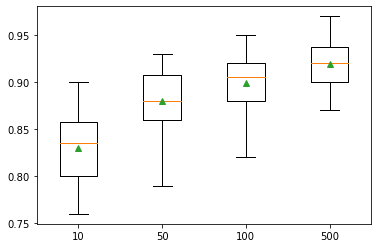

In [19]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Número de muestras</font>

- Se puede variar el número de muestras utilizadas para ajustar cada árbol. 
- Usar menos muestras introduce más variación para cada árbol, aunque puede mejorar el rendimiento general del modelo.
- El número de muestras utilizadas para ajustar cada árbol se especifica mediante el argumento `subsamples`
    - De forma predeterminada, está configurado en 1.0 para utilizar todo el conjunto de datos de entrenamiento. 

In [20]:
from numpy import arange

def get_models():
	models = dict()
	# explorar el ratio en incrementos de 10%
	for i in arange(0.1, 1.1, 0.1):
		# definir el modelo
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models

In [21]:
X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.861 (0.042)
>0.2 0.888 (0.037)
>0.3 0.903 (0.030)
>0.4 0.903 (0.023)
>0.5 0.905 (0.032)
>0.6 0.908 (0.027)
>0.7 0.905 (0.028)
>0.8 0.899 (0.032)
>0.9 0.901 (0.034)
>1.0 0.899 (0.030)


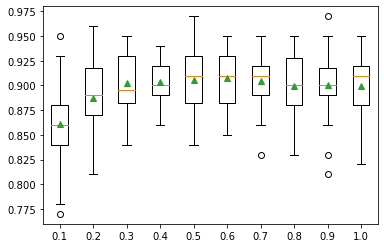

In [22]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Cantidad de características</font>

- Cambiar la cantidad de características introduce una variación adicional en el modelo, lo que puede mejorar el rendimiento, aunque podría requerir un aumento en la cantidad de árboles.
- Se especifica mediante el argumento `max_features` (por defecto escoge todas las características)
- Veamos un ejemplo probando desde 1 a las 20 características.

In [23]:
def get_models():
	models = dict()
	# explorar el  number of features from 1 to 20
	for i in range(1,21):
		models[str(i)] = GradientBoostingClassifier(max_features=i)
	return models

In [24]:
X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.865 (0.035)
>2 0.888 (0.036)
>3 0.896 (0.025)
>4 0.891 (0.035)
>5 0.896 (0.026)
>6 0.895 (0.029)
>7 0.899 (0.027)
>8 0.901 (0.029)
>9 0.900 (0.030)
>10 0.896 (0.033)
>11 0.897 (0.037)
>12 0.902 (0.034)
>13 0.900 (0.035)
>14 0.896 (0.033)
>15 0.898 (0.031)
>16 0.899 (0.030)
>17 0.904 (0.027)
>18 0.899 (0.035)
>19 0.897 (0.033)
>20 0.899 (0.031)


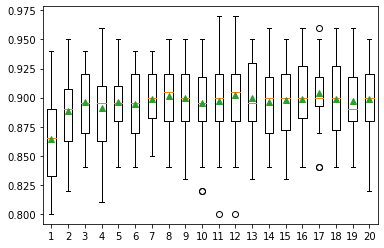

In [25]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section34"></a> 
## <font color="#004D7F"> 3.4. Tasa de aprendizaje</font>

- La tasa de aprendizaje controla la cantidad de contribución que cada modelo tiene en la predicción del conjunto.
- Tasas más pequeñas pueden requerir más árboles
- Tasas más altas pueden requerir un conjunto con menos árboles.
- Es común explorar los valores de la tasa de aprendizaje en una escala logarítmica, como entre un valor muy pequeño como 0,0001 y 1,0.
- La tasa de aprendizaje se puede controlar mediante el argumento `learning_rate` (por defecto es 0,1). 
- Veamos un ejemplo que compara el efecto de valores [0.0001, 0.001, 0.01, 0.1, 1.0].

In [26]:
def get_models():
	models = dict()
	# definir la tasa de aprendizaje
	rates = [0.0001, 0.0001, 0.001, 0.01, 0.1]
	for r in rates:
		key = '%.4f' % r
		models[key] = GradientBoostingClassifier(learning_rate=r) 
	return models

In [27]:
X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.0001 0.761 (0.043)
>0.0010 0.781 (0.034)
>0.0100 0.836 (0.034)
>0.1000 0.898 (0.030)


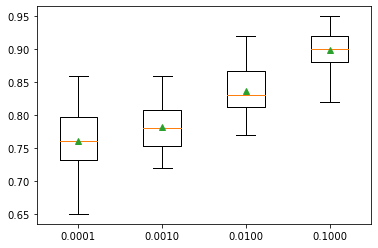

In [28]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section35"></a> 
## <font color="#004D7F"> 3.5. Profundidad del árbol</font>

- La profundidad del árbol controla qué tan especializado está cada árbol en el conjunto de datos de entrenamiento: qué tan general o sobreajustado puede ser.
- Se prefieren árboles que no sean demasiado superficiales y generales (como AdaBoost) ni demasiado profundos y especializados (como la Bagging). 
- GBM funciona bien con árboles que tienen una profundidad modesta y encuentran un equilibrio entre habilidad y generalización.
- La profundidad del árbol se controla mediante el argumento `max_depth` (por defecto es 3). 
- Veamos un ejemplo con una profundidad entre 1 y 10.

In [29]:
def get_models():
	models = dict()
	# definir la profundidad entre 1 y 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i)
	return models

In [30]:
X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.834 (0.031)
>2 0.877 (0.029)
>3 0.899 (0.030)
>4 0.904 (0.031)
>5 0.913 (0.029)
>6 0.912 (0.036)
>7 0.909 (0.028)
>8 0.891 (0.037)
>9 0.843 (0.038)
>10 0.826 (0.035)


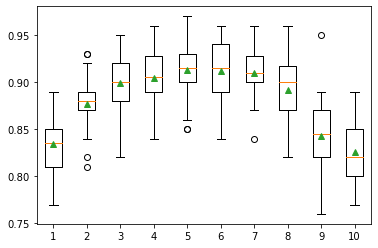

In [31]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section4"></a> 
# <font color="#004D7F"> 4. Búsqueda de hiperparámetros por GridSearch</font>

- Al igual que AdaBoost, GBM tiene muchos hiperparámetros clave que influyen en el comportamiento del modelo.
- Buscaremos en cuatro hiperparámetros clave para GBM: la cantidad de árboles utilizados en el conjunto, la tasa de aprendizaje, el tamaño de submuestra utilizado para entrenar cada árbol y la profundidad máxima de cada árbol.
- Cada combinación de configuración se evaluará mediante validación cruzada repetida de _k_ veces.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
</div>

In [32]:
from sklearn.model_selection import GridSearchCV


X, y = get_dataset()
# definir el modelo
model = GradientBoostingClassifier()
# definimos el rango de valores a buscar
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# definimos el método de validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# definimos el GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# ejecutar GridSearch
grid_result = grid_search.fit(X, y)
# resumen de los resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor: 0.947667 usando {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.5}


In [33]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) con: %r" % (mean, stdev, param))

0.530333 (0.091742) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.527000 (0.082952) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.524000 (0.072874) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.775333 (0.039811) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.769000 (0.038066) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.738667 (0.049982) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.826333 (0.029494) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.815000 (0.036492) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.761000 (0.043077) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.832333 (0.035561) con: {'learning_rate': 0.0001, '

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---